# Import Libraries

In [1]:
################# Data Analysis & Calculation #################
import numpy as np 
import pandas as pd  

################# Ignore Warning #################
import warnings
warnings.filterwarnings("ignore")

################# Visualization #################
import matplotlib.pyplot as plt 
import seaborn as sns 

################# Machine Learning #################
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

################# Sequential Feature Selector #################
from sklearn.feature_selection import SequentialFeatureSelector as sfs

# Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Data Science\Machine Learning\Logistics Regression\Logistic Regresssion Project\Logistic Regresssion Project LMS\Dataset\h1n1_vaccine_prediction.csv")

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

# Data Preprocessing 

In [4]:
# Remove unwanted columns
df = df.drop('unique_id',axis=1)

### Identifying & Treatment Missing Value

In [5]:
# Identify missing values
df.isna().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

#### Replacing Missing value by Mode

In [6]:
# Replace missing values with mode
for col in df:
    
    df[col].fillna(df[col].mode()[0], inplace=True)

### Identifying & Treatment Outliers

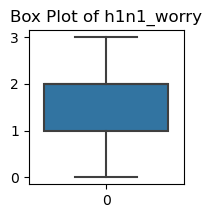

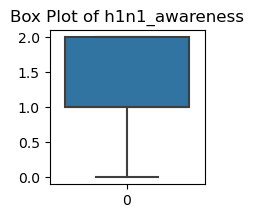

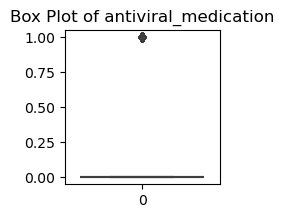

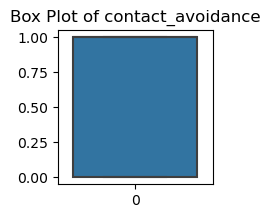

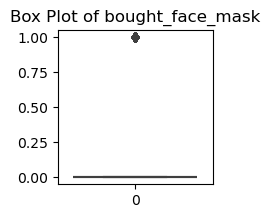

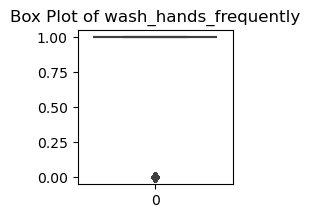

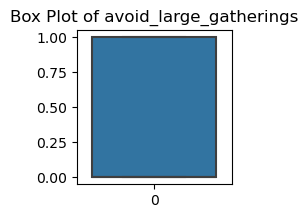

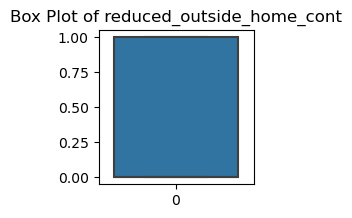

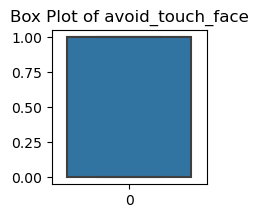

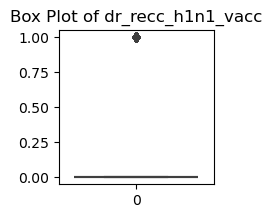

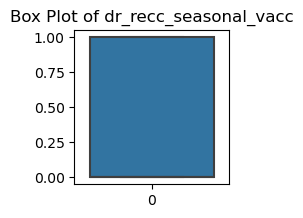

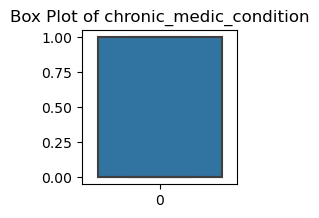

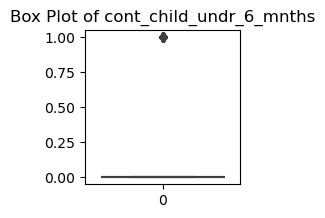

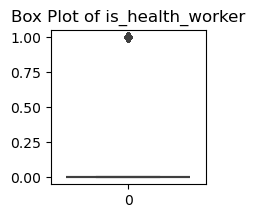

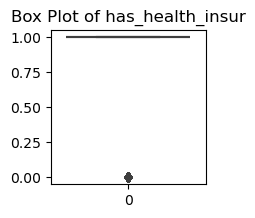

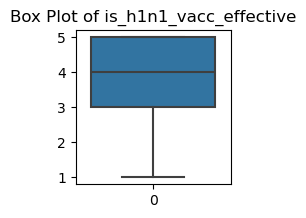

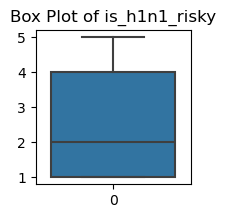

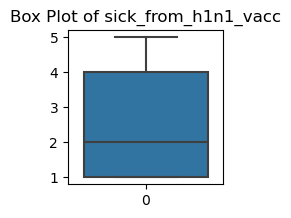

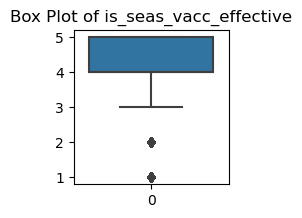

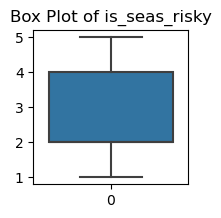

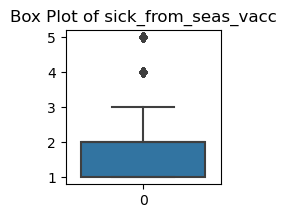

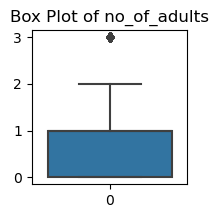

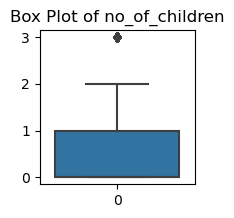

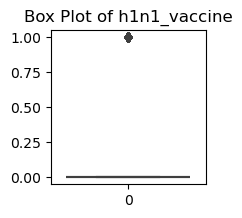

In [7]:
# Identify & treat outliers
for col in df.describe().columns:
    
    plt.figure(figsize=(2,2))
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Encoding Categorical Columns

In [8]:
# Breaking data into two parts categorical columns and numerical columns

numerical_col = df.select_dtypes(include=[np.number])
categorical_col = df.select_dtypes(include=['object'])

# Converting categorical columns into number
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_col = categorical_col.apply(le.fit_transform)

# Combining the both columns

data = pd.concat([numerical_col,categorical_col], axis=1)

# Data Partition

In [9]:
# Split the data into training and testing sets

x = data.drop(['h1n1_vaccine'],axis=1)
y = data['h1n1_vaccine']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Building

In [10]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

# Logistic Regression 
log_reg = LogisticRegression()

# Sequential Feature Selection
model = sfs(log_reg, n_features_to_select= 5 , direction='forward', scoring= 'accuracy')
model.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=5, scoring='accuracy')

In [11]:
model.get_feature_names_out()

array(['dr_recc_h1n1_vacc', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'age_bracket'], dtype=object)

In [12]:
x_train = x_train.loc[:,['dr_recc_h1n1_vacc', 'is_health_worker', 'is_h1n1_vacc_effective','is_h1n1_risky', 'age_bracket']]

In [13]:
# Train Logistic Regression Model
log_reg_model = log_reg.fit(x_train,y_train)

In [14]:
coefficients = log_reg_model.coef_
intercept = log_reg_model.intercept_

print('Intercept:', intercept)
print('Coefficients:',coefficients)

Intercept: [-5.94388679]
Coefficients: [[1.6808412  0.89212699 0.6682224  0.39165533 0.131931  ]]


# Predictions on Train Dataset

In [15]:
train = pd.concat([x_train, y_train],axis=1)

# Predictions on Train Dataset
train['probability_bad'] = log_reg_model.predict_proba(x_train)[:,1]

train['predicted'] = np.where(train['probability_bad'] >= 0.7, 1, 0)

# Model Performance Metrics on Train

In [16]:
from sklearn.metrics import confusion_matrix

# Model Performance Metrics on Train
matrix = confusion_matrix(train['predicted'], train['h1n1_vaccine'])
matrix

array([[16508,  3612],
       [  313,   932]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report

# Model Performance classification report Train
print(classification_report(train['predicted'], train['h1n1_vaccine']))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     20120
           1       0.21      0.75      0.32      1245

    accuracy                           0.82     21365
   macro avg       0.59      0.78      0.61     21365
weighted avg       0.94      0.82      0.86     21365



* Accuracy of  Model is 82%, Hence Model is Good Fit 
* Accuracy of Bad Capture by Model is 75% ( Sensitivity )
* Accuracy of Good Capture by Model is 82% (Specificity)

# Predictions on Test Dataset

In [18]:
x_test = x_test.loc[:,['dr_recc_h1n1_vacc', 'is_health_worker', 'is_h1n1_vacc_effective','is_h1n1_risky', 'age_bracket']]

test = pd.concat([x_test, y_test],axis=1)

In [19]:
test = pd.concat([x_test, y_test],axis=1)

test['probability_bad'] = log_reg_model.predict_proba(x_test)[:,1]

test['predicted'] = np.where(test['probability_bad'] >= 0.7, 1, 0)

# Model Performance Metrics

In [20]:
from sklearn.metrics import confusion_matrix

# Model Performance Metrics on Test
matrix = confusion_matrix(test['predicted'], test['h1n1_vaccine'])
matrix

array([[4150,  903],
       [  62,  227]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report

# Model Performance classification report Train
print(classification_report(test['predicted'], test['h1n1_vaccine']))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      5053
           1       0.20      0.79      0.32       289

    accuracy                           0.82      5342
   macro avg       0.59      0.80      0.61      5342
weighted avg       0.94      0.82      0.86      5342



* Accuracy of  Model is 82%, Hence Model is Good Fit 
* Accuracy of Bad Capture by Model is 79% ( Sensitivity )
* Accuracy of Good Capture by Model is 82% (Specificity)

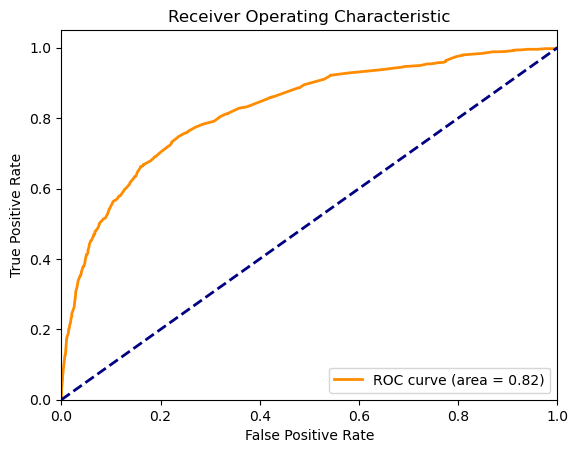

In [22]:
# ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test['h1n1_vaccine'], test['probability_bad'])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Business / Client Submission

In [23]:
x = list(x_train.columns)
x.insert(0,'Intercept')
Model_Values = pd.DataFrame(np.concatenate((log_reg_model.intercept_.tolist(), log_reg_model.coef_.flatten())),index=x,columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,-5.943887
dr_recc_h1n1_vacc,1.680841
is_health_worker,0.892127
is_h1n1_vacc_effective,0.668222
is_h1n1_risky,0.391655
age_bracket,0.131931


h1n1_vaccine = Intercept + (1.680841 * dr_recc_h1n1_vacc) + (0.892127 * is_health_worker) + (0.668222 is_h1n1_vacc_effective) + (0.391655 * is_h1n1_risky) + (0.131931 * age_bracket)

# Live Data 

In [24]:
live_data = df.loc[[231,423,352,545,244],['dr_recc_h1n1_vacc', 'is_health_worker', 'is_h1n1_vacc_effective','is_h1n1_risky', 'age_bracket']]

# breaking up live data into numerical and categorical
live_numerical_data = live_data.select_dtypes(include=[np.number])
live_categorical_data = live_data.select_dtypes(include=['object'])

# encoding live categorical data
from sklearn.preprocessing import LabelEncoder
live_categorical_data = live_categorical_data.apply(LabelEncoder().fit_transform)

live_data = pd.concat([live_numerical_data,live_categorical_data],axis=1)

# prediction on live data

live_data['probability_bad'] = log_reg_model.predict_proba(live_data)[:,1]

live_data['prediction'] = np.where(live_data['probability_bad']>= 0.7,'Yes', 'No')

live_data

,dr_recc_h1n1_vacc,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,age_bracket,probability_bad,prediction
231,0.0,0.0,5.0,1.0,2,0.124853,No
423,0.0,0.0,5.0,1.0,0,0.098756,No
352,0.0,0.0,3.0,2.0,1,0.046354,No
545,0.0,0.0,1.0,1.0,2,0.009755,No
244,0.0,0.0,4.0,2.0,1,0.086609,No
